Davide Pasetto - 239941

Deborah Aloisi - 249948

# Exercise 1



Samples per accept Ray: 2.045617265009717
Samples per accept Rice: 2.15726458850178


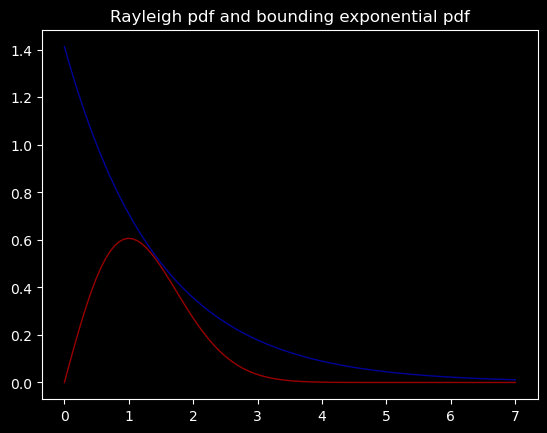

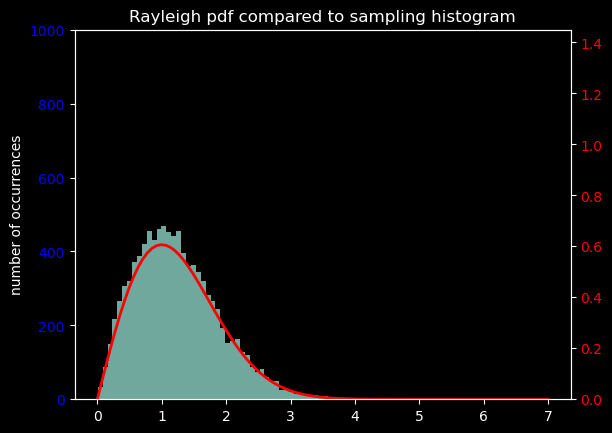

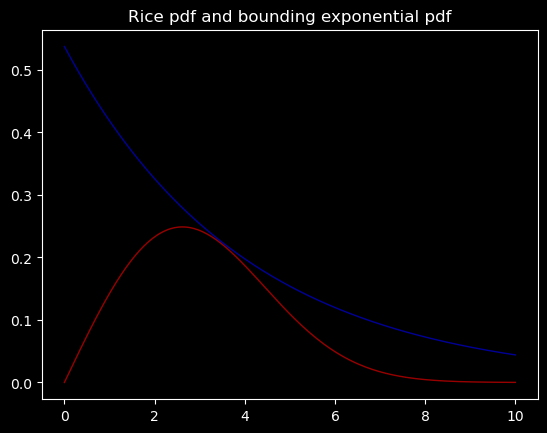

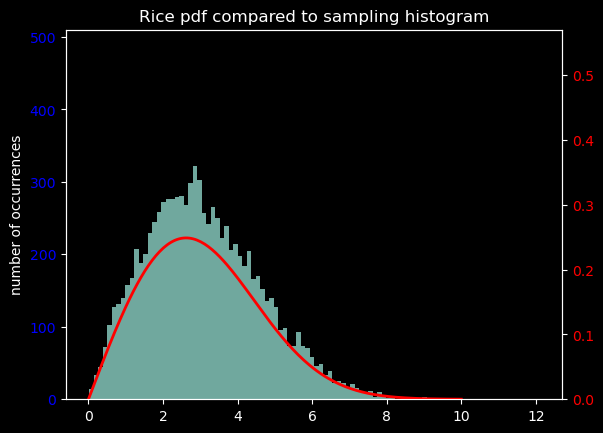

In [1]:
import numpy as np
from scipy import stats
from scipy.stats import rayleigh
from scipy.stats import expon
from scipy.special import i0
import random
from random import uniform
import matplotlib.pyplot as plt
import math
import numpy as np

sz = 20000
bin_default = 80



#-------------------- COMMON FUNCTIONS --------------------

#calculated the value of the exponent function
def calculate_expon(x, sc, lambd):
    return sc*lambd*math.e**(-lambd*x)


#rejection sampling, samples = x values, y1 = bounding funtion, y2 = function to sample
def accept(samples,y1,y2):
    accepted = []
    for a,b,c in zip(samples, y1, y2):
        ran = random.uniform(0,b)
        if ran <=c:
            accepted.append(a)
    return accepted

#plots the function and the histogram
def plot_comparison(accepted, x, y, name, ylim1, ylim2, bin_num=bin_default):
    fig, ax1 = plt.subplots()
    ax1.hist(accepted, bins=bin_num, alpha=0.8)
    plt.ylim(0,ylim1)
    plt.ylabel("number of occurrences")
    for tl in ax1.get_yticklabels():
        tl.set_color('blue')
    ax2 = ax1.twinx()
    ax2.plot(x, y,'r-', lw=2, alpha=1, label='rice pdf')
    plt.ylim([0,ylim2])
    for tl in ax2.get_yticklabels():
        tl.set_color('red')
    plt.title(name+" pdf compared to sampling histogram")

# function to calculate Rayleigh pdf at point x
def calculate_ray(x,sigma):
    return (x/(sigma**2))*math.e**(-x**2/(2*sigma**2))

# function to calculate Rice pdf at point x
def calculate_rice(x):
    sigma=2
    v=2
    return (x/sigma**2)*math.e**(-(x**2 + v**2)/(2*sigma**2))*i0(x*v/sigma**2)

# ------------------------- RAYLEIGH -------------------------
# generating rayleigh and exponential pdf
sc=2.05
scale_factor=1.45
lambd=1/scale_factor

fig, ax = plt.subplots(1, 1)
x = np.linspace(0,7, 100)
ray = rayleigh()
y_ray = [calculate_ray(i,1) for i in x]
y_expon = [calculate_expon(i, sc, lambd) for i in x]




# plotting ray and exponential
exp = expon(scale=scale_factor)
ax.plot(x, y_expon,'b-', lw=1, alpha=0.6, label='expon pdf')
ax.plot(x, y_ray, 'r-', lw=1, alpha=0.6, label='rayleigh pdf')
plt.title("Rayleigh pdf and bounding exponential pdf")


# generating samples according to exponential pdf
samples=exp.rvs(size=sz)
#calculating exp and ray values for the samples
exp_y_samples = [calculate_expon(i, sc, lambd) for i in samples]
ray_y_samples = [calculate_ray(i,1) for i in samples]

#accepting values
accepted = accept(samples, exp_y_samples, ray_y_samples)
#plotting comparison between rayleigh pdf and accepted values histogram
plot_comparison(accepted, x, y_ray, "Rayleigh", 1000, 1.45, bin_num = 60)
print("Samples per accept Ray:",sz/len(accepted))

# ------------------------- RICE -------------------------

# generating and plotting exponential bounding pdf and rice pdf
sc=2.15
scale_factor=4
lambd=1/scale_factor

fig, ax = plt.subplots(1, 1)
x = np.linspace(0,10,200)
exp_2 = expon(scale = scale_factor)

y_rice = [calculate_rice(i) for i in x]
y_expon = [calculate_expon(i,sc,lambd) for i in x]
ax.plot(x, y_rice,'r-', lw=1, alpha=0.6, label='rice pdf')
ax.plot(x, y_expon,'b-', lw=1, alpha=0.6, label='exponential pdf' )
plt.title("Rice pdf and bounding exponential pdf")

# sampling exponential bounding pdf
samples=exp_2.rvs(size=sz)

# caculating rice and exp. values for the samples
y_expon_samples = [calculate_expon(i,sc,lambd) for i in samples]
y_rice_samples = [calculate_rice(i) for i in samples]

#accepting values
accepted=[]
accepted = accept(samples, y_expon_samples, y_rice_samples)

#plotting comparison between rice pdf and accepted value histogram
plot_comparison(accepted, x, y_rice, "Rice", 510, 0.57, bin_num=100)
print("Samples per accept Rice:",sz/len(accepted))


---

# Exercise 2



## 1


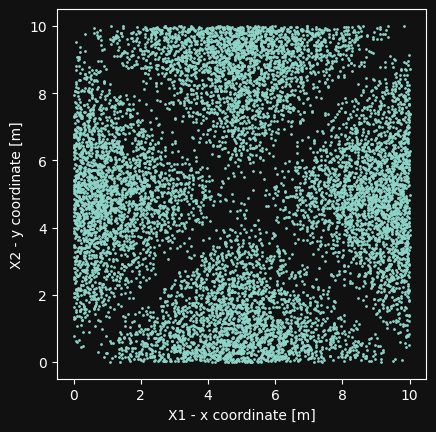

In [77]:
import matplotlib.pyplot as plt
import random

random.seed(42)  # for reproducibility

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)

num_samples = 10000
samples = [sample_vector() for n in range(num_samples)]

# Plot the samples
plt.scatter([x[0] for x in samples], [x[1] for x in samples], s=1)
plt.xlabel('X1 - x coordinate [m]')
plt.ylabel('X2 - y coordinate [m]')
ax =  plt.gca()
ax.set_aspect('equal')
plt.show()

## 2


Success probability: 0.9150
95% confidence interval: [0.8750, 0.9500]


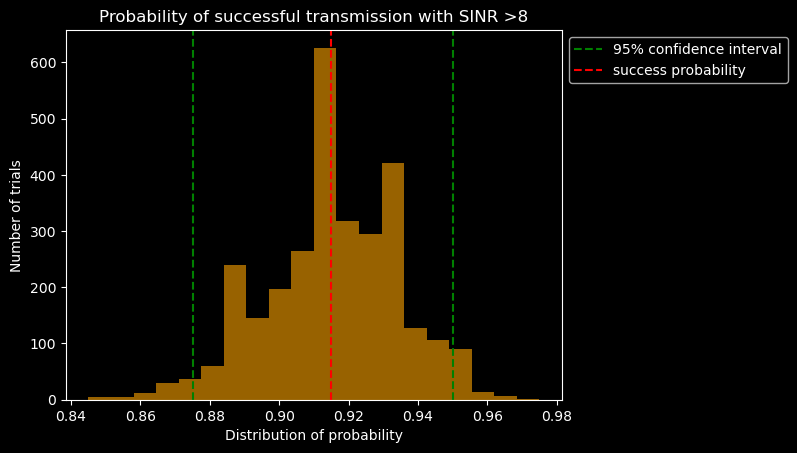

In [22]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 20000 
num_trials = 3000  # number of trials
num_pairs = 200  # number of pairs per trial
random.seed(876567)

def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_snr(d_tx_rx):
    return (P_tx / (N * d_tx_rx**2))

def simulate_trial():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        while rx_index == tx_index:
            rx_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        snr = compute_snr(d_tx_rx)
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities = []
trials = []
for n in range(num_trials):
    trial = simulate_trial()
    success_probabilities.append(trial)
    trials.append(n)


success_probability = np.mean(success_probabilities)
confidence_interval = np.percentile(success_probabilities, [2.5, 97.5])
print(f"Success probability: {success_probability:.4f}")
print(f"95% confidence interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

plt.hist(success_probabilities, color='orange', alpha=0.6, bins=20)
plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval[1], color="green", ls="--")
plt.axvline(x=success_probability, color="red", ls="--", label="success probability")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.title( "Probability of successful transmission with SINR >8")
plt.show()


## 3


Success probability: 0.1056
95% confidence interval: [0.0650, 0.1500]


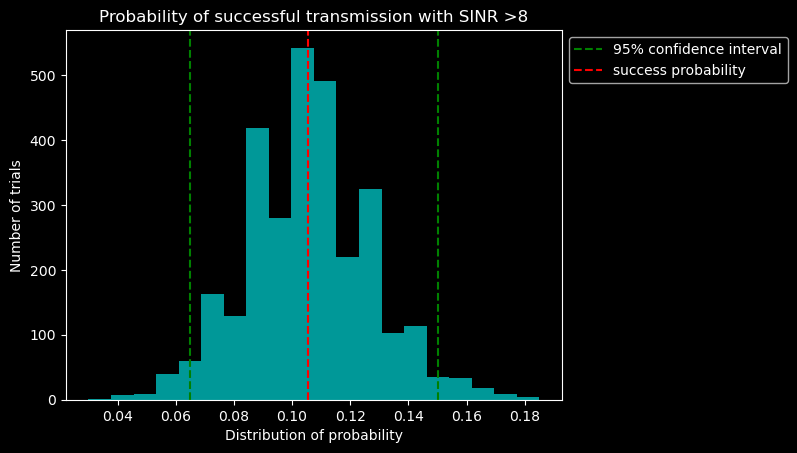

In [23]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 20000 
num_trials = 3000  # number of trials
num_pairs = 200  # number of pairs per trial
random.seed(876567)

def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_sinr(d_tx_rx, d_txI_rx):
    return ((P_tx*d_tx_rx**(-2)) / (N + P_tx*d_txI_rx**(-2)))

def simulate_trial():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        txI_index = random.randint(0, num_samples-1)
        while rx_index == tx_index or txI_index == tx_index or rx_index == txI_index:
            rx_index = random.randint(0, num_samples-1)
            txI_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        d_txI_rx = compute_distance(samples[tx_index], samples[txI_index])
        sinr = compute_sinr(d_tx_rx, d_txI_rx)
        if sinr > 8:
            success_count += 1
            #print("  d:"+str(d_tx_rx)+", di:"+str(d_txI_rx)+" - d/di:"+str(d_tx_rx/d_txI_rx) + "--> d<di :"+str(bool(d_tx_rx<d_txI_rx)))#+" -- se :"+ str(bool(d_txI_rx-d_tx_rx>2)))
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]


success_probabilities = []
for n in range(num_trials):
    trial = simulate_trial()
    success_probabilities.append(trial)

success_probability = np.mean(success_probabilities)
confidence_interval = np.percentile(success_probabilities, [2.5, 97.5])
print(f"Success probability: {success_probability:.4f}")
print(f"95% confidence interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")

plt.hist(success_probabilities, color='cyan', alpha=0.6, bins=20)
plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval[1], color="green", ls="--")
plt.axvline(x=success_probability, color="red", ls="--", label="success probability")
plt.title( "Probability of successful transmission with SINR >8")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

## 4

SNR:Success probability: 0.6764
SNR:95% confidence interval: [0.6100, 0.7400]
SINR:Success probability: 0.1621
SINR:95% confidence interval: [0.1100, 0.2150]


<function matplotlib.pyplot.show(close=None, block=None)>

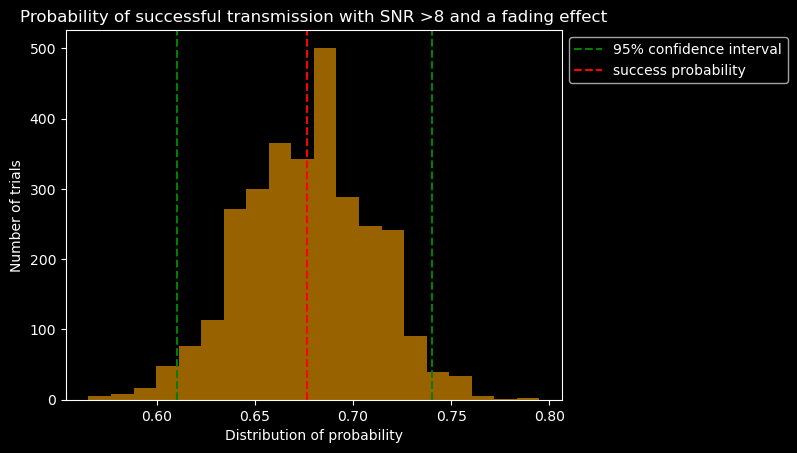

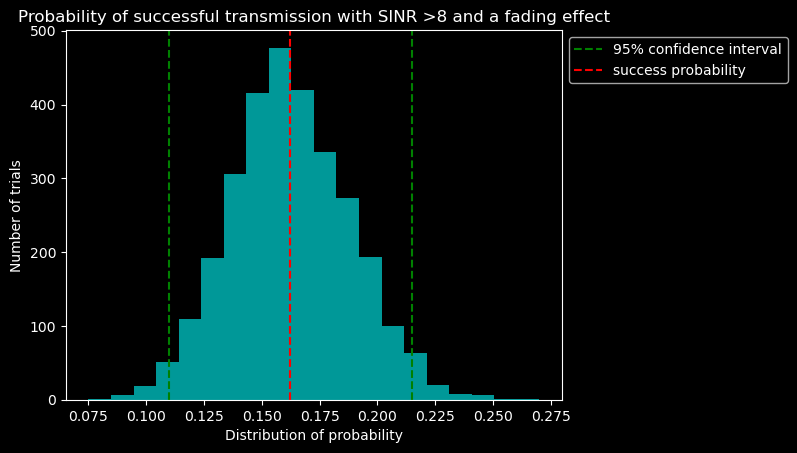

In [24]:
import random
import numpy as np
from scipy.stats import expon

# Constants
P_tx = 0.1  
N = 1.6e-4  
num_samples = 20000
num_trials = 3000  # number of trials
num_pairs = 200  # number of pairs per trial
random.seed(876567)

# exponential variable ξtx
l = 1
exp = expon(scale=1/l)


def exp_def():
    e = exp.rvs(size=1)
    return e




def compute_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def compute_snr_f(d_tx_rx,e_tx):
    return (P_tx * e_tx/ (N * d_tx_rx**2))

def compute_sinr_f(d_tx_rx, d_txI_rx, e_tx, e_I):
    return ((P_tx*e_tx*d_tx_rx**(-2)) / (N + P_tx*e_I*d_txI_rx**(-2)))



def simulate_trial_snr_f():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        while rx_index == tx_index:
            rx_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        snr = compute_snr_f(d_tx_rx, exp_def())
        if snr > 8:
            success_count += 1
    return success_count / num_pairs

def simulate_trial_sinr_f():
    success_count = 0
    for n in range(num_pairs):
        tx_index = random.randint(0, num_samples-1)
        rx_index = random.randint(0, num_samples-1)
        txI_index = random.randint(0, num_samples-1)
        while rx_index == tx_index or txI_index == tx_index or rx_index == txI_index:
            rx_index = random.randint(0, num_samples-1)
            txI_index = random.randint(0, num_samples-1)
        d_tx_rx = compute_distance(samples[tx_index], samples[rx_index])
        d_txI_rx = compute_distance(samples[tx_index], samples[txI_index])
        sinr = compute_sinr_f(d_tx_rx, d_txI_rx, exp_def(),exp_def())
        if sinr > 8:
            success_count += 1
    return success_count / num_pairs

def sample_vector():
    while True:
        x1 = random.uniform(0, 10)
        x2 = random.uniform(0, 10)
        u = random.uniform(0, 10)
        if u <= abs((-1)*x1 +10 - x2):
            if u <= abs(x1-x2):
                break
    return (x1, x2)


samples = [sample_vector() for n in range(num_samples)]
ax1, ax2 = plt.subplots()

success_probabilities_snr = []
for n in range(num_trials):
    trial = simulate_trial_snr_f()
    success_probabilities_snr.append(trial)

success_probability_snr = np.mean(success_probabilities_snr)
confidence_interval_snr = np.percentile(success_probabilities_snr, [2.5, 97.5])
print(f"SNR:Success probability: {success_probability_snr:.4f}")
print(f"SNR:95% confidence interval: [{confidence_interval_snr[0]:.4f}, {confidence_interval_snr[1]:.4f}]")


success_probabilities_sinr = []
for n in range(num_trials):
    trial = simulate_trial_sinr_f()
    success_probabilities_sinr.append(trial)

success_probability_sinr = np.mean(success_probabilities_sinr)
confidence_interval_sinr = np.percentile(success_probabilities_sinr, [2.5, 97.5], method='normal_unbiased')
print(f"SINR:Success probability: {success_probability_sinr:.4f}")
print(f"SINR:95% confidence interval: [{confidence_interval_sinr[0]:.4f}, {confidence_interval_sinr[1]:.4f}]")


plt.figure(0)
plt.hist(success_probabilities_snr, color='orange', alpha=0.6, bins=20)

plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval_snr[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval_snr[1], color="green", ls="--")
plt.axvline(x=success_probability_snr, color="red", ls="--", label="success probability")
plt.title( "Probability of successful transmission with SNR >8 and a fading effect")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show

plt.figure(1)
plt.hist(success_probabilities_sinr, color='cyan', alpha=0.6, bins=20)

plt.xlabel('Distribution of probability')
plt.ylabel('Number of trials')
plt.axvline(x=confidence_interval_sinr[0], color="green", ls = "--", label="95% confidence interval")
plt.axvline(x=confidence_interval_sinr[1], color="green", ls="--")
plt.axvline(x=success_probability_sinr, color="red", ls="--", label="success probability")
plt.title( "Probability of successful transmission with SINR >8 and a fading effect")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show




----------------------------